# 37 - Correlación de Datos


* En este Notebook vamos a ver como obtener los ***valores de correlación entre variables***.


* Dadas dos variables de un Dataset $(a_1,b_1), (a_2,b_2), ..., (a_n,b_n)$ se define el coeficiente de correlación lineal entre A y B como $r_{ab}$, siendo esta una ***medida de dependencia lineal entre las dos variable A y B.***


* La correlación entre dos variables ***puede tomar valores entre [-1,1]*** indicando los valores más cercanos a ***-1 y 1 que las variables tienen una depencia lineal muy alta*** y con valores ***cercanos a 0, una dependencia lineal muy baja***.


* El objetivo de ver la correlación entre variables para la resolución de problemas de aprendizaje es el de ***eliminar las variables que estan altamente correladas entre sí*** (o son similares entre sí) con el objetivo de no pasar al Algoritmo de Aprendizaje ***variables que no le sean útiles al modelo generado para discernir o tomar decisiones***.


* Con la eliminación de variables muy correladas (si las hubiese) conseguimos reducir el número de variables del Dataset a utilizar por el algoritmo de aprendizaje lo que significa que:
    + ***Reduciremos los tiempos de computo*** al tener que trabajar con menos datos
    + ***Reduciremos el "ruido" en los datos*** ya que dos variables similares entre sí no ayuda a los algoritmos de aprendizaje a aprender y puede generar peores modelos.

<hr>


* Veamos a continuación un ejemplo de como calcular la correlación entre variables y como eliminar las que estan correladas entre sí:


## 1. Cargamos los datos


* Vamos a cargar el dataset de calorias.


* Para hacer el ejemplo un poco más didáctico, vamos a crearnos una nueva columna llamada 'Peso_gramos' que tendremos el valor de los elementos de la columna 'Peso' en gramos; es decir, el mismo valor multiplicado por 1000:

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("./data/calorias_running/calories_time_weight_speed.csv")
df['Peso_gramos'] = df['Peso'].apply(lambda x: x * 1000)
df.sample(5)

,Calorias,Tiempo,Peso,Velocidad,Peso_gramos
4412,1174.4,62.3,79.3,13.8,79300.0
4852,910.9,56.4,69.6,13.4,69600.0
3928,1046.4,53.5,83.9,13.5,83900.0
3575,1025.1,50.1,77.4,15.3,77400.0
506,743.8,68.1,60.8,10.4,60800.0


<hr>


## 2. Correlación entre variables

* Con la funcion de pandas ***.corr()***, nos devuelve la matriz de correlaciones entre cada par de variables:

In [2]:
df_corr = df.corr()
df_corr

,Calorias,Tiempo,Peso,Velocidad,Peso_gramos
Calorias,1.000000,0.892129,0.263631,0.008829,0.263631
Tiempo,0.892129,1.000000,-0.006131,-0.297225,-0.006131
Peso,0.263631,-0.006131,1.000000,-0.017812,1.000000
Velocidad,0.008829,-0.297225,-0.017812,1.000000,-0.017812
Peso_gramos,0.263631,-0.006131,1.000000,-0.017812,1.000000


* Los valores cercanos a 1 y -1 nos indican que son variables muy correladas entre sí y cuanto más cercano sea el valor a 0 nos indican que no están muy correladas.


* Como nos interesa saber el grado de correlación, podemos pasar esos valores a su valor absoluto.


* De la matriz de correlaciones solo nos interesa la matriz triangular superior o la inferior que es donde tenemos las correlaciones entre cada para de variables.


* Para ello vamos a quedarnos con el valor absoluto de la matriz triangular superior para ver las relaciones entre cada par de variables:

In [3]:
df_corr = df.corr().abs()
df_upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))
df_upper

,Calorias,Tiempo,Peso,Velocidad,Peso_gramos
Calorias,NaN,0.892129,0.263631,0.008829,0.263631
Tiempo,NaN,NaN,0.006131,0.297225,0.006131
Peso,NaN,NaN,NaN,0.017812,1.000000
Velocidad,NaN,NaN,NaN,NaN,0.017812
Peso_gramos,NaN,NaN,NaN,NaN,NaN


<hr>


## 3. Mapa de calor: Correlación entre variables


* El mapa de calor nos va a permitir ver de manera más sencilla la correlación entre variables:

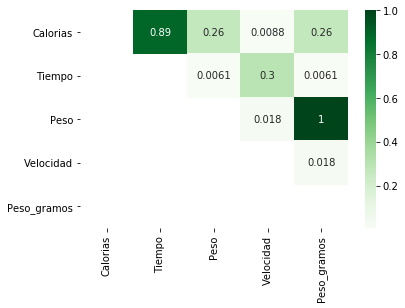

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

sns.heatmap(df_upper, annot=True, cmap="Greens")

<hr>


## 4. Eliminación de variables altamente correladas:


* Lo que nos interesa es quedarnos con una variable de las que están correladas entre sí y eliminar el resto, definiendo un umbral (por ejemplo 0.95) y eliminando las variables que tengan una correlación superior a la definida en el umbral.


* La manera de eliminar esas variables del Dataset (del DataFrame de Pandas) a partir de un umbral sería la siguiente:

    1. Selección de columnas con un valor superior al umbral
    2. Eliminación de esas columnas

In [5]:
umbral = 0.95
to_drop = [column for column in df_upper.columns if any(df_upper[column] > umbral)]
print("Columnas a eliminar: {}".format(to_drop))
df = df.drop(df[to_drop], axis=1)
df.sample(5)

Columnas a eliminar: ['Peso_gramos']


,Calorias,Tiempo,Peso,Velocidad
4158,638.4,33.0,70.0,16.0
3242,812.2,58.3,57.2,14.1
2695,565.3,27.1,78.2,15.4
4952,813.5,51.0,69.1,13.4
2537,523.9,21.8,97.1,14.3


<hr>

*Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.*

<img src="./imgs/CC_BY-NC-SA.png" alt="CC BY-NC">